In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('datasets/cars_data.csv')
df.price

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [39]:
df = df.replace('?', np.nan)
df.info()
df.price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

# Cleaning the data!

## Cleaning the numeric data!

In [40]:
df = df.replace('?', np.nan)
# df.head(50)
df.price

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [41]:
df['price'] = pd.to_numeric(df['price'])
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['bore'] = pd.to_numeric(df['bore'])
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['wheel-base'] = pd.to_numeric(df['wheel-base'])
df['num-of-cylinders'] = df['num-of-cylinders'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})
df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [42]:
temp = df.select_dtypes(include=[np.number])
len(temp.columns)
print(temp.columns)
print(len(temp.columns))
print(len(temp.index))
temp.price

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
17
205


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [43]:
from sklearn.impute import SimpleImputer
# making the imputer and telling it to replace missing values with the median
imputer = SimpleImputer( strategy='median') # missing_values = np.nan,
# selecting the numeric columns so we don't break the imputer
df_num = df.select_dtypes(include=[np.number])
# print(df_num.shape)
print(len(df_num.columns))
print(df_num.columns)
# median is in statistics_ variable
imputer.fit(df_num)
x = imputer.transform(df_num)
len(x[0])
# creating a dataframe without any missing numeric types
df_num = pd.DataFrame(x, columns = df_num.columns, index=df_num.index)
df_num.price

17
Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [44]:
# THERE IS A PROBLEM WITH THIS BLOCK OF CODE
# I COMMENTED IT OUT BECAUSE WE APPEND NUM DF AND CAT DF LATER
# del_me = []
# for col in df_num:
#     del_me.append(col)
#     df[col] = df_num
# # df.describe()
# # df_num.head(50)
# print(del_me)
# df.price
df_num.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [45]:
# df_num.describe()
df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## Cleaning categorical data!

In [46]:
df_cat = df.select_dtypes(exclude=[np.number])

In [47]:
# WAS USING THIS TO REPLACE MISSING VALUES WITH SOMETHING USEFUL BUT I'M SHORT ON TIME
# temp = df_cat[(df_cat["num-of-doors"] != "two") & (df_cat["num-of-doors"] != "four") ]
# for i in range( len(temp["num-of-doors"]) ):
#     temp.iloc[i]["num-of-doors"] = "four"

In [48]:
df_cat = df_cat.fillna("other")

In [49]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoder = ordinal_encoder.fit_transform(df_cat)
# ordinal_encoder.categories_
df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## Combining the cleaned num and cat dataframes

In [51]:
# df = df_num.append(df_cat, ignore_index = False, sort=True) THIS CRAP DOESN'T WORK AT ALL (it adds more rows not columns)
for col in df_num:
    df[col] = df_num[col]
for col in df_cat:
    df[col] = df_cat[col]

df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

# Exploring the data!

AttributeError: 'DataFrame' object has no attribute 'show'

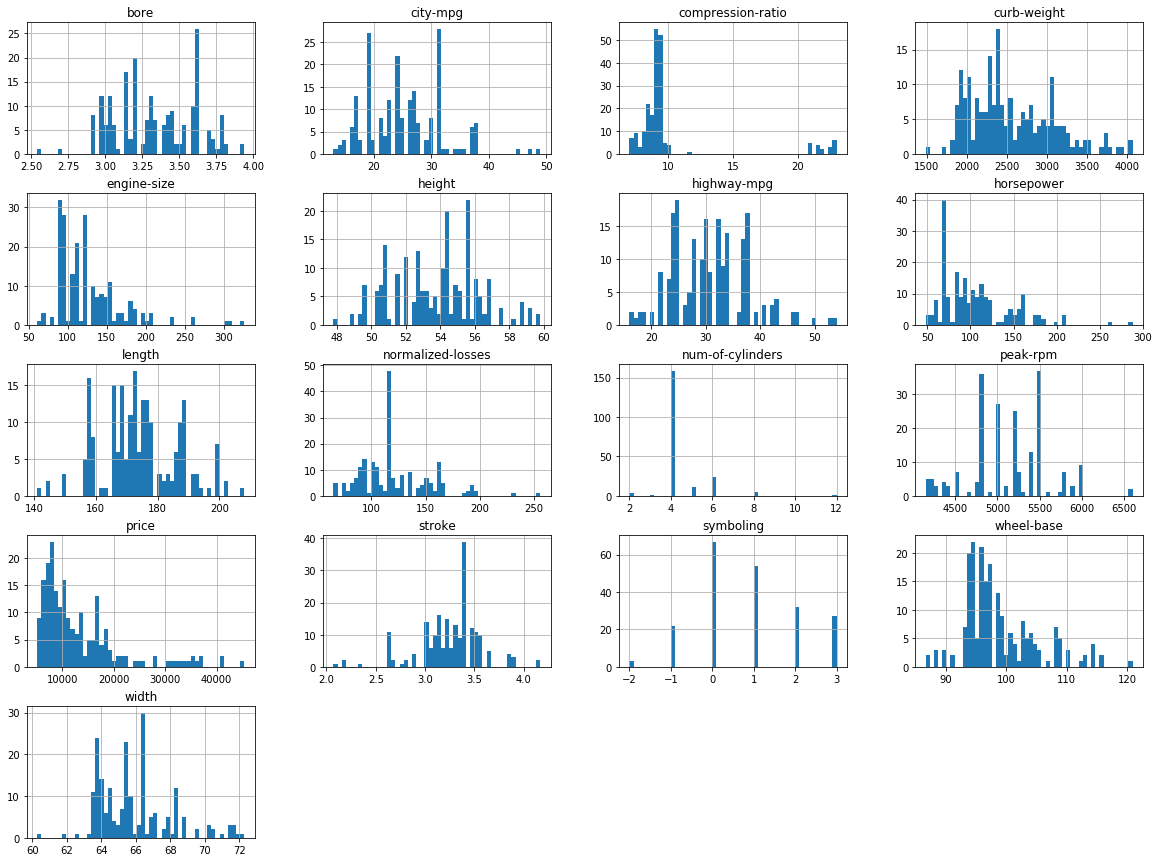

In [52]:
df.hist(bins=50, figsize=(20,15))
# bins are the number of bars you will use to show the data
# figsize defines how big each box will be for graph
# save_fig("attribute_history_gram") this is used in the source code but not mine
df.show()


In [58]:
corr_matrix = df.corr() 
corr_matrix
# looking at how the other numberic features relate to median_house_value
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.860343
curb-weight          0.819817
horsepower           0.749919
width                0.724558
length               0.686567
num-of-cylinders     0.681036
wheel-base           0.584847
bore                 0.532861
height               0.140439
normalized-losses    0.095489
stroke               0.083627
compression-ratio    0.072890
symboling           -0.080149
peak-rpm            -0.107283
city-mpg            -0.668822
highway-mpg         -0.693037
Name: price, dtype: float64

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

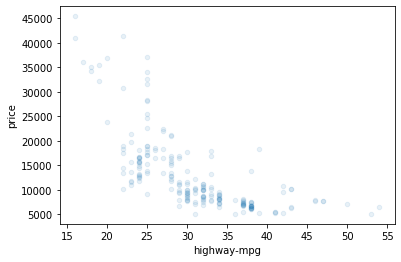

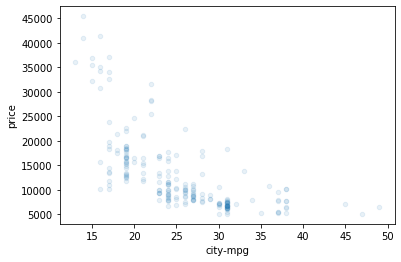

In [54]:
# df.plot(kind="scatter", x='engine-size', y='price', alpha=0.1) I'm letting this go because getting engine-size seems impossible in production
df.plot(kind="scatter", x='highway-mpg', y='price', alpha=0.1)
df.plot(kind="scatter", x='city-mpg', y='price', alpha=0.1)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

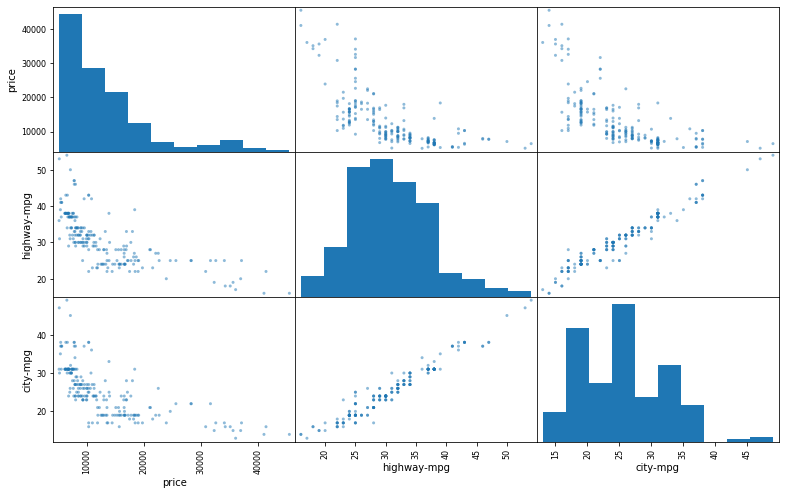

In [55]:
from pandas.plotting import scatter_matrix
attr = ['price','highway-mpg','city-mpg']
scatter_matrix(df[attr], figsize=(13,8))
df.price

In [56]:
# model_data = df[['price','highway-mpg','city-mpg']]
# model_data
df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

NameError: name 'cardataset' is not defined